**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Add ```/path/to/your/folder``` to load the images

In [21]:
cartoon = cv2.imread("/home/nikj/Desktop/OpenCV/images/cartoon.bmp")
cartoon_y = cv2.imread("/home/nikj/Desktop/OpenCV/images/cartoon_y.jpg")
girl = cv2.imread("/home/nikj/Desktop/OpenCV/images/girl.png") #grayscale image
girl_y = cv2.imread("/home/nikj/Desktop/OpenCV/images/girl_y.jpg")
fingerprint = cv2.imread("/home/nikj/Desktop/OpenCV/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/home/nikj/Desktop/OpenCV/images/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

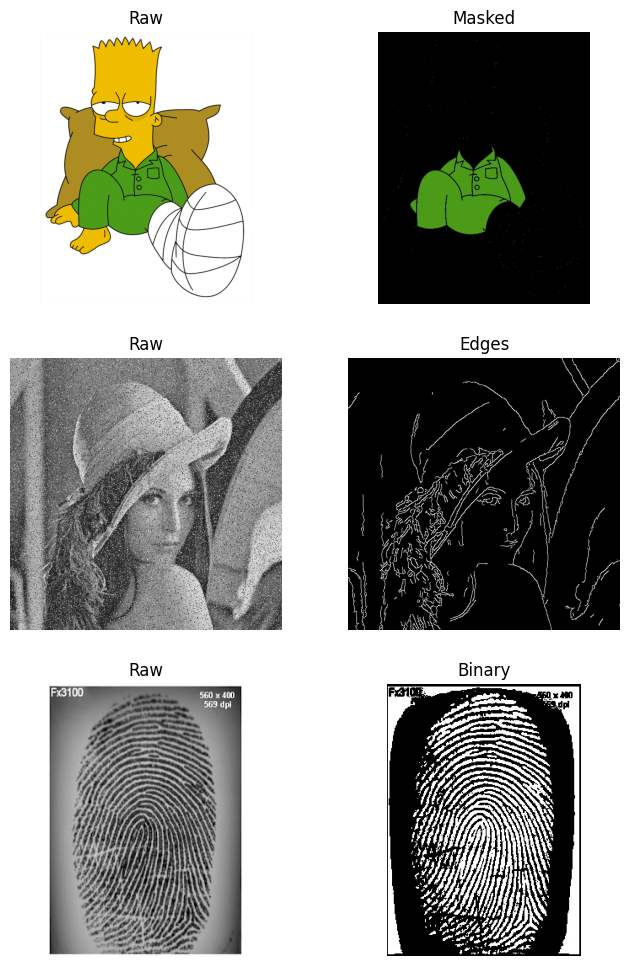

In [22]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [23]:
#START CODE HERE (Do all your processing here)

cartoon_y_mentee = None #(in RGB format only)


hsv_image = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)

lower_color = np.array([35, 50, 50])  
upper_color = np.array([85, 255, 255])  

mask = cv2.inRange(hsv_image, lower_color, upper_color)

kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

dress = cv2.bitwise_and(cartoon, cartoon, mask=mask)
cartoon_y_mentee = cv2.cvtColor(dress, cv2.COLOR_BGR2RGB)

# Save and display the result
cv2.imwrite('cartoon_y_mantee.png', cartoon_y_mentee)
cv2.imshow('cartoon_Y_mantee', cartoon_y_mentee)
cv2.waitKey(0)
cv2.destroyAllWindows()


#END CODE HERE (the final processed image should be cartoon_y_mentee)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [24]:
#START CODE HERE (Do all your processing here)

girl_y_mentee = None

girl_y_mentee = cv2.cvtColor(girl, cv2.COLOR_BGR2GRAY)
# Apply Gaussian Blur
#image = cv2.GaussianBlur(image, (3, 3), 0)###didnt work
#bilateral_image = cv2.bilateralFilter(image, 9, 75, 75)##DIDNT WORK
girl_y_mentee = cv2.medianBlur(girl, 5)
# Apply Canny edge detectio
girl_y_mentee = cv2.Canny(girl_y_mentee,100, 150) 
##^^yeah, this is not the right way(using one variable for everything.. but i had to do imshow for each to get the desired ouput)

cv2.imwrite('girl_y_mentee.png', girl_y_mentee)
cv2.imshow('Edge Detection', girl_y_mentee)
cv2.waitKey(0)
cv2.destroyAllWindows()

#END CODE HERE (the final processed image should be girl_y_mentee)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [25]:
#START CODE HERE (Do all your processing here)

fingerprint_y_mentee = None #(in Binary format only i.e. pixel intensity = 0 or 255)

gray_fingerprint = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to the grayscale image
_, fingerprint_y_mentee = cv2.threshold(gray_fingerprint, 127, 255, cv2.THRESH_BINARY)

cv2.imwrite('fingerprint_y_mentee.png', fingerprint_y_mentee)
cv2.imshow('Binary Fingerprint', fingerprint_y_mentee)
cv2.waitKey(0)
cv2.destroyAllWindows()

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

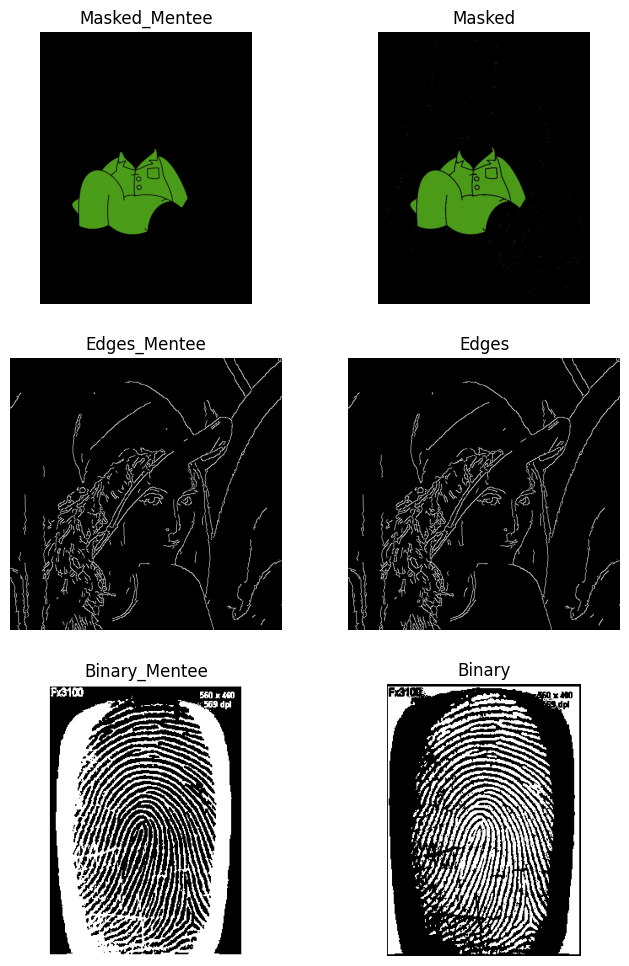

In [26]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()